## Gaussian Mixture Model

A complex density model $p(x)$ may be muiti-modal. However, we may be able to model it as a mixture of uni-modal distributions(e.g. Gaussians). And each mode may correspond to a different sub-population(e.g. male & female).

Consider a mixture of $K$ components, component $i$ has associated parameters $\theta_i$:

$$p(x)=\sum_{i=1}^Kp(x\mid y=i)P(y=i)$$

where $x$ is the observed data, $p(x\mid y)$ is the mixture component, $P(y)$ is the mixture propotion.

In this scenario, $p(x\mid y=i)=\mathcal{N}(\mu_i,\Sigma_i)$, $P(y=i)=\pi_i$. And for simplicity, $\Sigma_i = \sigma^2\mathbf{I}$.

To learning the parameters of GMM, we use MLE:

\begin{align*}
\arg\max_\theta\prod_{j=1}^nP(x_j\mid \theta) &= \arg\max_\theta\prod_{j=1}^n\sum_{i=1}^KP(y_j=i,x_j\mid \theta)\\
&=\arg\max_\theta\prod_{j=1}^n\sum_{i=1}^KP(y_j=i\mid \theta)p(x_j\mid y_j = i,\theta)\\
&=\arg\max_\theta\prod_{j=1}^n\sum_{i=1}^K\pi_i\frac{1}{\sqrt{2\pi\sigma^2}}\exp{(-\frac{\|x_j-\mu_i\|^2}{2\sigma^2}})\\
\end{align*}

If we assume **Hard assignment**:

$$P(y_i=i)=1\text{ if } i = C(j) \text{ otherwise } 0$$

\begin{align*}
\arg\max_\theta\prod_{j=1}^nP(x_j\mid \theta)
&=\arg\max_\theta\prod_{j=1}^n\sum_{i=1}^K\pi_i\frac{1}{\sqrt{2\pi\sigma^2}}\exp{(-\frac{\|x_j-\mu_i\|^2}{2\sigma^2}})\\
&=\arg\max_\theta\prod_{j=1}^n\exp{(-\frac{\|x_j-\mu_{C(j)}\|^2}{2\sigma^2}})\\
&=\arg\min_{\mu,C}\sum_{j=1}^n \|x_j-\mu_{C(j)}\|^2
\end{align*}

It is equal to K-means algorithm!!!

Then we assume general $\Sigma_i$, the objective is:

$$\arg\max_\theta\prod_{j=1}^n\sum_{i=1}^K\pi_i\frac{1}{\sqrt{|{2\pi\Sigma_i}|}}\exp{\big[-\frac{(x_j-\mu_i)^T\Sigma_i^{-1}(x_j-\mu_i)}{2}\big]}$$

We can set $\frac{\partial}{\partial\mu_i}\log P(\cdot)=0$, but our objective is non-linear, non-analytically solvable.

How about gradient descent? Doable but often slow.

**USE Expectation-Maximization Algorithm!!!**

## Expectation-Maximization Algorithm

EM algorithm is a general algorithm to deal with hidden data, and is an optimization strategy for objective functions that can be interpreted as likelihiids in the presence of missing data.

E-step: fill-in hidden values using inference

M-step: apply standard MLE/MAP method to completed data

Let likelihood function be $\mathcal{L}(D\mid\theta)$, and the hidden variable is $y$, it holds that

\begin{align*}
\mathcal{L}(D\mid\theta) &\equiv P(D\mid\theta)\\
&=\int P(D,y\mid\theta)dy\\
&=\int Q(y)\frac{P(D,y\mid\theta)}{Q(y)}dy\\
\end{align*}

Take log-likelihood, $\forall \theta,Q(y)$, by Jensen's inequality $\mathbb{E}\log(x)\leq \log{\mathbb{E}x}$ we have

\begin{align*}
\ell(D\mid\theta)&=\log{\int Q(y)\frac{P(D,y\mid\theta)}{Q(y)}}dy\\
&\geq\int Q(y)\log{\frac{P(D,y\mid\theta)}{Q(y)}}dy\\
&\equiv F(Q,\theta)\\
\end{align*}

where $F(\cdot)$ is called **Free Energy**. 

To maximize the log-likelihood, it is enough to maximize free energy.

Re-write algorithm at iterative step $t$:

E-step:

$$Q^{t+1}(y)=\arg\max_QF(Q,\theta^t)$$

M-step:

$$\theta^{t+1}=\arg\max_\theta F(Q^{t+1},\theta)$$

It is natural to hope a tight lower bound for log-likelihood, so at E-step, we would like $Q(y)$ maximize free energy, i.e. a proper $Q(y)$ should let the "$=$" hold in Jensen's inequality. Hence 

$$Q(y)\propto P(D,y\mid \theta)$$

so that $\frac{P(D,y\mid \theta)}{Q(y)}=c$. Meanwhile, $\int Q(y)dy=1$, therefore let

$$Q(y)=P(y\mid D,\theta)$$

And the posterior $P(y\mid D,\theta)$ maximize the target over all distributions over $y$, i.e. E-step constructs the lower bound. In fact, it can be shown that

$$\ell(D\mid\theta)=F(Q,\theta) + \text{KL}(Q(y)\|P(y\mid D,\theta))$$

where $\text{KL}(Q(y)\|P(y\mid D,\theta))\equiv\int Q(y)\log{\frac{Q(y)}{P(y\mid D,\theta)}}dy\geq 0$. Note that if the posterior is inaccessible for us, it is popular using variational method to approximate $Q(y)$ or simulation such as MCMC.

Let us begin at time $t$, at M-step:

\begin{align*}
F(Q,\theta) &= \int Q(y)\log{\frac{P(D,y\mid \theta)}{Q(y)}}\\
&= \int Q(y)\log{P(D,y\mid \theta)}dy - \int Q(y)\log{Q(y)}dy\\
&= \int Q(y)\log{P(D,y\mid \theta)}dy + H_Q\\
\end{align*}

where $H_Q\equiv - \int Q(y)\log{Q(y)}dy$ is the **Entropy**, it is independent with $\theta$ for we compute $Q(y)$ using previous $\theta$. Therefore in M-step, we should do

$$\arg\max_\theta \int Q(y)\log{P(D,y\mid \theta)}dy$$

\begin{theorem}

During the EM algorithm the marginal likelihood is not decreasing.

$$\mathcal{L}(D\mid\theta^t)\leq \mathcal{L}(D\mid\theta^{t+1})$$

\end{theorem}

\begin{proof}

\begin{align*}
\mathcal{L}(D\mid\theta^{t+1})&\geq \int P(y\mid D,\theta^t)\log{\frac{P(y,D\mid\theta^{t+1})}{P(y\mid D,\theta^t)}} dy\\
&\geq \int P(y\mid D,\theta^t)\log{\frac{P(y,D\mid\theta^{t})}{P(y\mid D,\theta^t)}} dy\\
&=\mathcal{L}(D\mid\theta^{t})
\end{align*}

\end{proof}

## GMM Derivation

We have objective

$$\arg\max_\theta\prod_{j=1}^n\sum_{i=1}^K\pi_i\frac{1}{\sqrt{|{2\pi\Sigma_i}|}}\exp{\big[-\frac{(x_j-\mu_i)^T\Sigma_i^{-1}(x_j-\mu_i)}{2}\big]}$$

According to the theory, the objective can be

\begin{align*}
\int Q(y)\log{P(D,y\mid \theta^t)}dy&=\sum_{j=1}^n\sum_{i=1}^KP(y_j=i\mid x_j,\theta^{t-1})\log{P(x_j,y_j=i\mid\theta^t)}\\
&= \sum_{j=1}^n\sum_{i=1}^KP(y_j=i\mid x_j,\theta^{t-1})[\log{P(x_j\mid y_j=i,\theta^t)}+\log{P(y_j=i\mid\theta^t)}]\\
&\propto\sum_{j=1}^n\sum_{i=1}^KP(y_j=i\mid x_j,\theta^{t-1})-\big[\frac{(x_j-\mu_i)^T\Sigma_i^{-1}(x_j-\mu_i)}{2}\big]+\log{\pi_i}\\
\end{align*}

where $\theta^t=[\mu_1^t,\dots,\mu_K^t,\pi_1^t,\dots,\pi_K^t,\Sigma_1^t,\dots,\Sigma_K^t]$.

E-step:

$$R_{i,j}^{t-1}\equiv P(y_j=i\mid x_j,\theta^{t-1})=\frac{\mathcal{N}(x_j\mid\mu_i^{t-1},\sigma_i^{t-1})\pi_i}{\sum_{i=1}^K\mathcal{N}(x_j\mid\mu_i^{t-1},\sigma_i^{t-1})\pi_i}$$

M-step:

Set $\frac{\partial}{\partial\theta^t}\int Q(y)\log{P(D,y\mid \theta^t)}dy=0$

We have

$$\mu_j^t=\sum_{j=1}^nw_jx_j$$

where $w_j=\frac{R_{i,j}^{t-1}}{\sum_{j=1}^nR_{i,j}^{t-1}}$.

$$\Sigma_i^t=\sum_{j=1}^nw_j(x_j-\mu_i^t)(x_j-\mu_i^t)^T$$

$$\pi_i^t=\frac{1}{n}\sum_{j=1}^nR_{i,j}^{t-1}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class GMM:
    
    def __init__(self, X):
        self.X = X
        # the number of observations of training set
        self.len = len(self.X)
        self.feature = self.X.shape[-1]

    def initialize(self, n):
        self.n = n
        self.pi = 1.0 * np.ones(self.n) / self.n
        # initial guess of parameters
        self.mu= np.zeros((self.n, self.feature))
        self.Sigma = np.zeros((self.n, self.feature, self.feature))
        for i in range(self.n):
            self.mu[i] = np.random.uniform(self.X.min(axis = 0), self.X.max(axis = 0))
            self.Sigma[i] = np.eye(self.feature)
        return "Successfully initialize"
    
    def Gaussian(self, target, mu, Sigma):
        prob = np.zeros(self.n)
        coef = np.zeros(self.n)
        exponent = np.zeros(self.n)
        for i in range(self.n):
            # adding Laplace smooth to avoid sigular matrix
            det = np.linalg.det(Sigma[i] + np.eye(len(mu[i])) * 0.01)
            inv = np.linalg.inv(Sigma[i] + np.eye(len(mu[i])) * 0.01)
            mx = target - mu[i]
            coef[i] = 1.0 / np.sqrt((2 * np.pi) ** self.feature * det)
            exponent[i] = -0.5 * np.dot(np.dot(mx, inv),mx)
        # avoid underflow
        exponent = exponent - np.min(exponent)
        prob = coef * np.exp(exponent)
        return prob
        
    def training(self, maxCycle = 50):
        self.R = np.zeros((self.len, self.n))
        for t in range(maxCycle):
            # E-step
            for obs in range(self.len):
                # likelihood
                temp = self.Gaussian(self.X[obs], self.mu, self.Sigma) * self.pi
                self.R[obs] = temp / np.sum(temp)
            if np.any(np.isnan(self.R) == True):
                return "Numerical flawness"
            # M-step
            normalizer = np.sum(self.R, axis = 0)
            self.pi = 1.0 / self.len * normalizer
            w = 1.0 * self.R / normalizer
            self.mu = np.dot(w.T, self.X)
            for i in range(self.n):
                mx = self.X - self.mu[i]
                self.Sigma[i] = np.dot(np.dot(mx.T, np.diag(w[:, i])), mx)
        return "Training successfully"
    
    def predicting(self, x):
        prob = self.Gaussian(x, self.mu, self.Sigma)
        return np.argmax(prob)

In [3]:
m_1 = np.array([0,0])
s_1 = np.eye(2)

m_2 = np.array([16,16])
s_2 = np.array([[2,0.5],[0.5,2]])

m_3 = np.array([10,6])
s_3 = np.array([[1,0.5],[0.5,1]])

n = 20

X = np.vstack((np.random.multivariate_normal(m_1,s_1, n), np.random.multivariate_normal(m_2,s_2, n), \
               np.random.multivariate_normal(m_3,s_3, n)))
x = np.array([2, 2])

In [4]:
clu = GMM(X)
clu.initialize(3)
clu.training(50)

'Training successfully'

In [5]:
clu.mu

array([[  9.92265609,   5.9900328 ],
       [ 15.99831079,  15.59047583],
       [ -0.33303331,   0.06873915]])

In [6]:
clu.Sigma

array([[[ 0.65334626,  0.57981413],
        [ 0.57981413,  1.36024946]],

       [[ 1.67096777,  0.92339231],
        [ 0.92339231,  2.20181272]],

       [[ 1.45916046, -0.17656519],
        [-0.17656519,  0.81648536]]])

In [7]:
clu.pi

array([ 0.3333333 ,  0.33333337,  0.33333333])

In [8]:
clu.predicting(x)

2

In [9]:
def gaussian(target, mean, cov):
    dim = cov.shape[0]
    det = np.linalg.det(cov + np.eye(dim) * 0.01 )
    inv = np.linalg.inv(cov + np.eye(dim) * 0.01 )
    mx = target - mean
    return 1.0 / np.sqrt((2 * np.pi)**dim * det) * np.exp(-0.5 * np.dot(np.dot(mx, inv), mx))

def draw(data, mean, cov, n):
    minimum = data.min(axis = 0)
    maximum = data.max(axis = 0)
    x = np.linspace(minimum[0] - 0.05 * abs(maximum[0]), maximum[0] + 0.05 * abs(maximum[0]) , n)
    y = np.linspace(minimum[1] - 0.05 * abs(maximum[1]), maximum[1] + 0.05 * abs(maximum[1]) , n)
    xx, yy = np.meshgrid(x, y)
    zz = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
             zz[i][j] = np.sum(gaussian(np.array([xx[i][j], yy[i][j]]), mean[c], cov[c]) for c in range(cov.shape[0]))
    gci = plt.imshow(zz, origin = "lower", cmap = "jet")
    for i in range(len(data)):
        plt.plot((data[i][0] - np.min(data[:, 0])) / (x[1] - x[0]), (data[i][1] - np.min(data[:, 1])) / (y[1] - y[0]), 'k.')
    plt.xticks([0, len(x) - 1], [x[0], x[-1]])
    plt.yticks([0, len(y) - 1], [y[0], y[-1]])
    plt.title("The GMM cluster result")

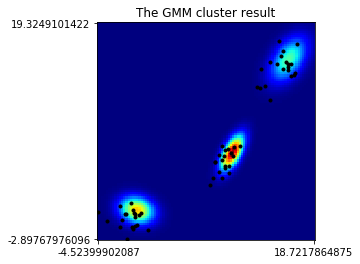

In [10]:
draw(X, clu.mu, clu.Sigma, 100)